### Importações e definição de clientes de processador
O basico de todo programa


In [1]:
import dask.dataframe as dd
import dask.array as da
import numpy as np
from dask.distributed import Client


c = Client(n_workers=4)
c.cluster


## Leitura do arquivo


In [2]:
df=dd.read_csv('dielectron.csv')
df.head(6)
#para encontrar os nomes das colunas como strings
#list(df.columns)

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.202670,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.028420,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.420480,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.218380,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.093750,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718
5,147115,366663412,6.39616,-5.45672,-2.090680,-2.60078,5.84352,-0.431551,-2.77571,-1,21.3865,15.169800,-8.87030,-12.1893,17.57280,-0.647450,-0.529120,-1,18.40230


In [3]:
#separetes missing values rows (usar depois como prova de algoritmo bom)
clean_df =df[~df.isna().any(axis=1)]
bad_df   =df[df.isna().any(axis=1)]


## Representação básica dos dados do arquivo
Apenas a titulo de curiosidade

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Energy relation with mass')

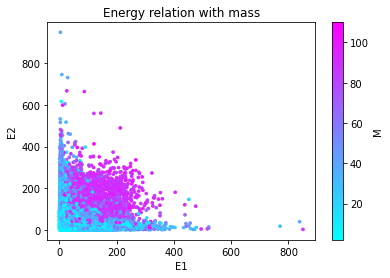

In [5]:
plt.scatter (clean_df['E1'].compute(), clean_df['E2'].compute(), c=clean_df['M'].compute(), cmap= 'cool', s=7)
plt.colorbar(label='M')
plt.xlabel('E1')
plt.ylabel('E2')
plt.title('Energy relation with mass')

In [6]:
M=clean_df['M'].compute()
PX1=clean_df['px1 '].compute()
PY1=clean_df['py1'].compute()
PZ1=clean_df['pz1'].compute()
P1=[np.sqrt(px*px + py*py + pz*pz) for px, py, pz in zip(PX1, PY1, PZ1)]
PX2=clean_df['px2'].compute()
PY2=clean_df['py2'].compute()
PZ2=clean_df['pz2'].compute()
P2=[np.sqrt(px*px + py*py + pz*pz) for px, py, pz in zip(PX2, PY2, PZ2)]


Text(0.5, 1.0, 'Momentum relation with mass')

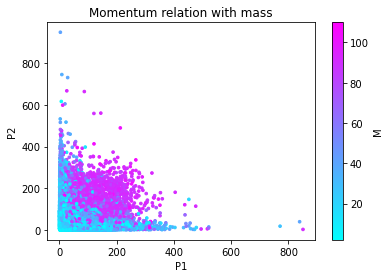

In [7]:
plt.scatter (P1, P2, c=M, cmap= 'cool', s=7)
plt.colorbar(label='M')
plt.xlabel('P1')
plt.ylabel('P2')
plt.title('Momentum relation with mass')

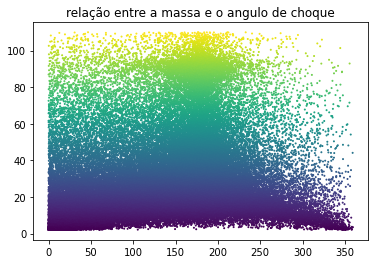

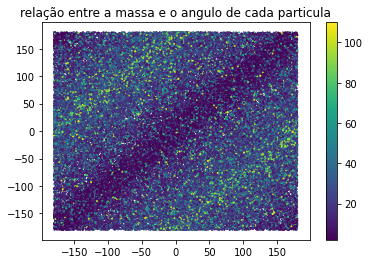

In [8]:
angle_dif=np.abs(clean_df['phi1'].compute()-clean_df['phi2'].compute())
plt.scatter(angle_dif*180/3.1415,M, s=1, c=M)
plt.title('relação entre a massa e o angulo de choque')
plt.show()
plt.scatter(clean_df['phi1'].compute()*180/3.1415, clean_df['phi2'].compute()*180/3.1415, c=M, s=1)
plt.title('relação entre a massa e o angulo de cada particula')
plt.colorbar()

# Aprendizado de máquina
## separação dos dados entre data e target test e train

In [9]:
import pandas
y=clean_df['M']
X=clean_df.drop(labels=['M','Run','Event'], axis=1)


In [10]:
np.random.seed(0)

test_percentage=0.3
indices = np.random.permutation(len(X))
X_train = X.to_dask_array()[indices[:-int(test_percentage*len(X))]]
y_train = y.to_dask_array()[indices[:-int(test_percentage*len(X))]]
X_test = X.to_dask_array()[indices[-int(test_percentage*len(X)):]]
y_test = y.to_dask_array()[indices[-int(test_percentage*len(X)):]]
X_train

dask.array<getitem, shape=(69941, 16), dtype=float64, chunksize=(69941, 16), chunktype=numpy.ndarray>

In [11]:
y_train

dask.array<getitem, shape=(69941,), dtype=float64, chunksize=(69941,), chunktype=numpy.ndarray>

In [12]:
#modelo basico de como tirar os dados imperfeitos
'''
#limpeza dos Nans de X e y
def checkTrue(Mat):
    for i in Mat:
        if i.any() == True:
            return True
    return False

def TrueIndex(vec):
    c=0
    Trues=[]
    for i in vec:
        if i == True:
            Trues.append(c)
        c+=1
    return Trues


Nanindexs = da.isnan(y_train).compute()
clean_y_train=y_train[~Nanindexs]
clean_X_train=X_train[~Nanindexs]

checkTrue(da.isnan(clean_y_train).compute())
checkTrue(da.isnan(clean_X_train).compute())
'''

'\n#limpeza dos Nans de X e y\ndef checkTrue(Mat):\n    for i in Mat:\n        if i.any() == True:\n            return True\n    return False\n\ndef TrueIndex(vec):\n    c=0\n    Trues=[]\n    for i in vec:\n        if i == True:\n            Trues.append(c)\n        c+=1\n    return Trues\n\n\nNanindexs = da.isnan(y_train).compute()\nclean_y_train=y_train[~Nanindexs]\nclean_X_train=X_train[~Nanindexs]\n\ncheckTrue(da.isnan(clean_y_train).compute())\ncheckTrue(da.isnan(clean_X_train).compute())\n'

## Modelo linear

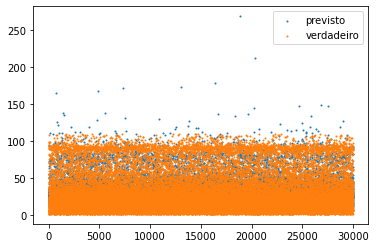

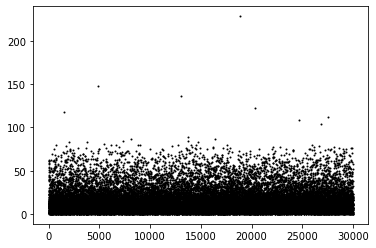

In [14]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
M_predicted=regr.predict(X_test)
plt.scatter(np.arange(len(M_predicted)),M_predicted, s=1, label= 'previsto')
plt.scatter(np.arange(len(M_predicted)),y_test, s=1, label='verdadeiro')

plt.legend()
plt.show()
plt.scatter(np.arange(len(M_predicted)),np.abs(y_test-M_predicted), label='diferença', s=1, c='k')


## Modelo de percepção de multi-camadas (MLP - Multi layer perception)

In [13]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [14]:
# testando MLP de regressão
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

MLPreg = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

MLPreg.score(X_test, y_test)

0.9963348893843158

Text(0.5, 1.0, 'diferença entre previsto e real pelo MLP')

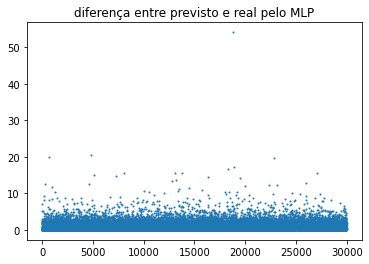

In [16]:
M_predicted=MLPreg.predict(X_test)
y_MLP=MLPreg.predict(X_test)
plt.scatter(np.arange(len(M_predicted)),np.abs(y_test-y_MLP), label='diferença', s=1)
plt.title('diferença entre previsto e real pelo MLP')

In [17]:
#y_test, y_MLP = zip(*sorted(zip(y_test, y_MLP)))

Text(0.5, 1.0, 'Plots ordenados pos aprendizado em MLP')

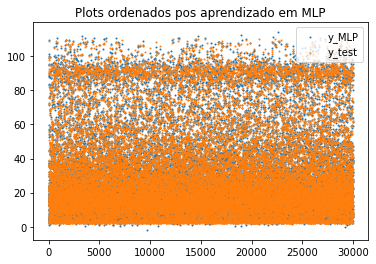

In [18]:
plt.scatter(np.arange(len(y_test)),y_MLP, label='y_MLP', s=1)
plt.scatter(np.arange(len(y_test)),y_test, label='y_test', s=1)
plt.legend()
plt.title('Plots ordenados pos aprendizado em MLP')

### Testando Parametros para MLP

In [18]:
import time

In [20]:
layer_sizes=(1,10,100,1000)
scores=[]
times=[]
for L_s in layer_sizes:
    start_time = time.time()
    ls_reg= MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes= L_s).fit(X_train, y_train)
    scores.append(ls_reg.score(X_test, y_test))
    times.append(time.time()-start_time)

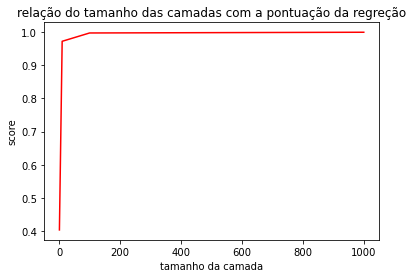

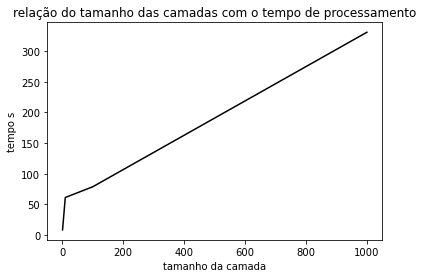

In [21]:
plt.plot(layer_sizes, scores, c='r')
plt.title('relação do tamanho das camadas com a pontuação da regreção')
plt.xlabel('tamanho da camada')
plt.ylabel('score')
plt.show()
plt.plot(layer_sizes, times, c='k')
plt.title('relação do tamanho das camadas com o tempo de processamento')
plt.xlabel('tamanho da camada')
plt.ylabel('tempo s')
plt.show()

In [22]:
activation_parameter=['identity', 'logistic', 'tanh', 'relu']
scores=[]
times=[]

for ap in activation_parameter:
    start_time = time.time()
    ap_reg= MLPRegressor(random_state=1, max_iter=500, activation=ap).fit(X_train, y_train)
    scores.append(ap_reg.score(X_test, y_test))
    times.append(time.time()-start_time)

In [23]:
'''
i=0
for ap in activation_parameter:
    print('o parametro %s obteve score de %f num tempo de %f' (ap, scores[i], times[i]))
    i+=1
    

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-23-e541e3599da9>, line 5)

In [24]:
print(scores)
print(times)

[0.40055244524350064, 0.9898553752447714, 0.9882525057725007, 0.9963348893843158]
[7.754738092422485, 88.64528298377991, 95.09745073318481, 72.99667763710022]


In [25]:
solver_parameter=['lbfgs', 'sgd', 'adam']
scores=[]
times=[]

for sp in solver_parameter:
    start_time = time.time()
    sp_reg= MLPRegressor(random_state=1, max_iter=500, solver=sp).fit(X_train, y_train)
    scores.append(sp_reg.score(X_test, y_test))
    times.append(time.time()-start_time)

C:\Users\cayra\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [26]:
print(scores)
print(times)

[0.9931310850334178, -0.0003586110152757893, 0.9963348893843158]
[173.9350287914276, 9.071606874465942, 73.22325587272644]


In [27]:
learning_parameter=['constant', 'invscaling', 'adaptive']
scores=[]
times=[]

for lp in learning_parameter:
    start_time = time.time()
    lp_reg= MLPRegressor(random_state=1, max_iter=500, learning_rate=lp).fit(X_train, y_train)
    scores.append(lp_reg.score(X_test, y_test))
    times.append(time.time()-start_time)

In [28]:
print(scores)
print(times)

[0.9963348893843158, 0.9963348893843158, 0.9963348893843158]
[74.112877368927, 74.49644923210144, 69.62701725959778]


In [29]:
L2_parameter= [pow(10.0,a) for a in np.arange(-10, 0, 1)]
scores=[]
times=[]

for l2p in L2_parameter:
    start_time = time.time()
    L2_reg= MLPRegressor(random_state=1, max_iter=500, alpha=l2p).fit(X_train, y_train)
    scores.append(L2_reg.score(X_test, y_test))
    times.append(time.time()-start_time)

In [30]:
print(scores)
print(times)

[0.9959427433164102, 0.9959075454090482, 0.995950967159437, 0.9957813657542305, 0.9959125995299329, 0.9945613566269911, 0.9963348893843158, 0.9962740413835716, 0.9958984824975435, 0.995570912013093]
[62.31488251686096, 62.913920164108276, 83.9804961681366, 71.8788514137268, 81.65118503570557, 84.63973689079285, 71.59161972999573, 71.99405479431152, 61.51854586601257, 68.76790499687195]


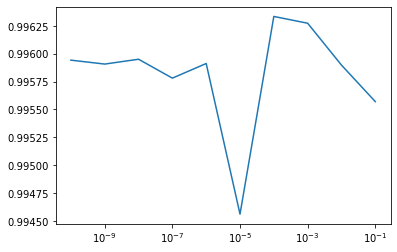

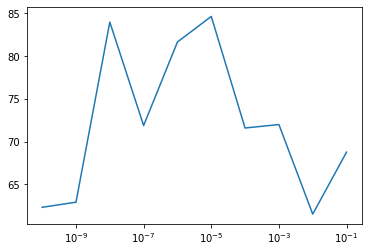

In [34]:
plt.plot(L2_parameter, scores)
plt.xscale('log')
plt.show()
plt.plot(L2_parameter, times)
plt.xscale('log')
plt.show()

### Testando regressão por aumentador gradiente (GBR - Gradient Boosting Regressor)

In [19]:
from sklearn import ensemble

In [20]:

GBReg = ensemble.GradientBoostingRegressor()
GBReg.fit(X_train, y_train)
t0=time.time()
score= GBReg.score(X_test, y_test)
GBRtime=time.time()-t0
score, GBRtime

(0.7819246209091907, 0.986365795135498)

### Testando regresão por floresta aleatoria (RFR - Random Forest Regressor)

In [21]:
import time 

t0=time.time()
RFReg = ensemble.RandomForestRegressor()
RFReg.fit(X_train, y_train)

score= RFReg.score(X_test, y_test)
RFRtime=time.time()-t0
score, RFRtime
#O melhor modelo é o MLP

(0.9462710702677744, 145.53447890281677)

### Comparação entre os modelos de regressão

In [22]:
 RFR_predict= RFReg.predict(X_test)

In [23]:
 MLP_predict= MLPreg.predict(X_test)

In [24]:
GBR_predict= GBReg.predict(X_test)

C:\Users\cayra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\cayra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribuiçao da massa')

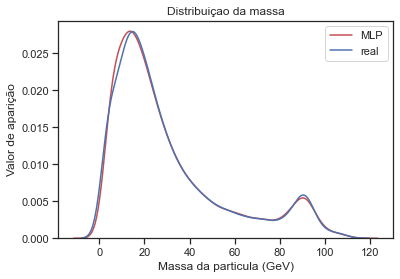

In [31]:
sns.set(style='ticks')
#sns.distplot(RFR_predict, hist=True, kde=True, color='c', label='RFR')
sns.distplot(MLP_predict, hist=False, kde=True, color='r', label='MLP')
#sns.distplot(GBR_predict, hist=True, kde=True, color='g', label='GBR')
sns.distplot(y_test, hist=False, kde=True, color='b', label='real')
plt.legend()
plt.xlabel('Massa da particula (GeV)')
plt.ylabel('Valor de aparição')
plt.title('Distribuiçao da massa')

In [35]:
MLPreg.score(X_test, y_test)

0.9963348893843158

In [34]:
def sbchunks(lst, n, mx, mn):
    
    
    res= np.zeros(n)
    for obj in lst:
        res[loc_chunk(obj, mx, mn, n)]
    return res
        
def loc_chunk(a, mx, mn, n):
    i=0
    intvs=np.linspace(mn, mx, n)
    dif=intvs[1]-intvs[0]
    for intv in intvs:
        if a<= intv:
            return i
        i+=1
    return 0

In [36]:
MAX=y_test.max()
MIN=y_test.min()

In [1]:
N=200
ChRFR=sbchunks(RFR_predict, N, MAX, MIN)
ChMLP=sbchunks(MLP_predict, N, MAX, MIN)
ChGBR=sbchunks(GBR_predict, N, MAX, MIN)
Chreal=sbchunks(y_test, N, MAX, MIN)

NameError: name 'sbchunks' is not defined

In [ ]:
intvs=np.linspace(mn, mx, n)
plt.plot(intvs, ChRFR, label='RFR')
plt.plot(intvs, ChMLP, label='MLP')
plt.plot(intvs, ChGBR, label='GBR')
plt.plot(intvs, Chreal, label='real')
plt.legend()

### Substituindo os dados ruins

In [ ]:
X_bad= bad_df.drop(labels=['M','Run','Event'], axis=1)

In [ ]:
M_bad=MLPreg.predict(X_bad)

In [ ]:
bad_df['M']=M_bad

In [ ]:
result = pd.concat(frames)

### Proximos passos

1. Procurar como escolher melhor os parametros do MLP
2. Marcar tempo de processamento do MLP
3. Comparar com os modelos prontos do Keggle
    Random forest regressor
    Gradient boosting regressor
    Neural Network Regressor
    
4. Testar outros modelos de regressão por deep learning do scikit-learn
5. ver diferença desse tipo de trabalho entre o normal e o Dask


### Perguntas para se estudar

1.  Como escolher o modelo de regressão? Quais as vantagens e desvantagens de cada modelo de regresão?
2.  Como escolher os parametros para cada modelo de regressão? Existe algum metodo para escolher o valor de L2?
3.  Qual a melhor forma de testar a precisão de um modelo? Score? MSE?
4.  Qual a melhor maneira de apresentar os dados? Vale a pena filtrar os dados para apresentar graficos mais rapido?
5.  Existe algum método melhor para medire recorrencia de valores? Como escolher parametros precisos e viaveis?
6. É possivel plotar a relação entre um único parametro e o valorprevisto para massa? Vale a pena fazer isso? Existe algum valor cientifico nesse tipo de dado?